| <p style="text-align: left;">Name</p>               | Matr.Nr. | <p style="text-align: right;">Date</p> |
| --------------------------------------------------- | -------- | ------------------------------------- |
| <p style="text-align: left">Fathy Shalaby</p> | 11701175 | 09.02.2020                            |

<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 4 (Assignment) -- Drug Discovery </h2>

<b>Authors:</b> Brandstetter, Schimunek, Schäfl<br>
<b>Date:</b> 30-03-2020

This file is part of the "Hands-on AI II" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

# Exercise 0

- Import the same modules as discussed in the lecture notebook.
- Check if your model versions are correct.

In [17]:
# your imports go here
import u4_utils as u4
import rdkit
import pandas as pd
import numpy as np
import sys
import scipy
import scipy.sparse as sp
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import SVG

from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from functools import partial
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from distutils.version import LooseVersion

In [18]:
# model version checks
u4.check_module_versions()

Installed Python version: 3.7 (✓)
Installed numpy version: 1.17.2 (✓)
Installed pandas version: 0.25.1 (✗)
Installed scikit-learn version: 0.22.2.post1 (✓)
Installed scipy version: 1.3.1 (✗)
Installed matplotlib version: 3.1.1 (✓)
Installed rdkit version: 2020.03.1 (✓)


# Exercise 1

We are looking at the lowest unoccupied molecular orbital energy (LUMO). You can access the values by <code>GetProp('LUMO')</code>. 

- Print <i>name</i> and <i>LUMO value</i> of the first $10$ molecules
- Which of (all) molecules has the <i>highest</i> LUMO value? Write a short piece of code to figure this out.

NOTA BENE: If you access  <code>GetProp('LUMO')</code> a string is returned. You might want to convert this string to a float value for the second task (<code>float()</code>).

In [19]:
# Load Dataset
suppl = Chem.SDMolSupplier('molecules.sdf')

In [20]:
# your code goes here
for i in range(10):
    m = suppl[i]
    print('Name:',Chem.MolToMolBlock(m).split('\n')[0],'||| LUMO score:',m.GetProp('LUMO'))

Name: 2-nitrophenanthrene ||| LUMO score: -1.246
Name: 8-nitroquinoline ||| LUMO score: -1.429
Name: 5-nitroquinoline ||| LUMO score: -1.456
Name: 1-nitrofluoranthene ||| LUMO score: -1.591
Name: 2,5-difluoronitrobenzene ||| LUMO score: -1.59
Name: 1,3,6,8-tetranitropyrene ||| LUMO score: -3.406
Name: 3-methyl-4-nitrobiphenyl ||| LUMO score: -1.144
Name: 2-acetoxy-7-nitrofluorene ||| LUMO score: -1.437
Name: 2-methyl-7-nitrofluorene ||| LUMO score: -1.387
Name: 9-nitrophenanthrene ||| LUMO score: -1.254


In [21]:
# your code goes here
mx_score = np.max([float(m.GetProp('LUMO')) for m in suppl])
for m in suppl:
    if float(m.GetProp('LUMO'))==mx_score:
        print('Name:',Chem.MolToMolBlock(m).split('\n')[0],'Score:',mx_score)

Name: 2-nitro-m-phenylenediamine Score: -0.529


# Exercise 2

- Find the molecule in <i>suppl</i> with the <i>highest</i> and the molecule with the <i>lowest</i> number of bonds and print their respective names.
- Draw the molecule with the <i>highest</i> number of bonds both <i>with</i> and <i>without</i> atoms numbered.
- For the molecule with the <i>highest</i> number of bonds, print the atoms (<code> GetIdx() </code>, <code> GetSymbol() </code>), their masses and check if they are in the ring. Compare the results with the drawing.

In [22]:
# your code goes here
list_bond = [float(m.GetNumBonds()) for m in suppl]
#GETTING MOLECULE WITH THE HIGHEST NUMBER OF BONDS
max_bond=np.max(list_bond)
min_bond=np.min(list_bond)
molecule_max =[]
molecule_min = []
#GETTING MOLECULE WITH THE LOWEST NUMBER OF BONDS
for m in suppl:
    if float(m.GetNumBonds())==max_bond:
        print('Name:',Chem.MolToMolBlock(m).split('\n')[0],'Score:',max_bond)
        molecule_max.append(m)
    if float(m.GetNumBonds())==min_bond:
        print('Name:',Chem.MolToMolBlock(m).split('\n')[0],'Score:',min_bond)
        molecule_min.append(m)



Name: 1-nitrocoronene Score: 33.0
Name: 5,10-dinitrobenzo[ghi]perylene Score: 33.0
Name: 5,8-dinitrobenzo[ghi]perylene Score: 33.0
Name: nitrobenzene Score: 9.0


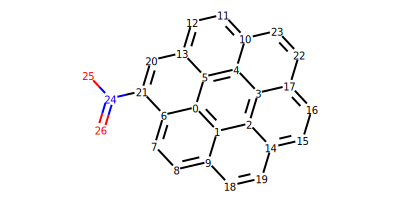

In [23]:
# your code for drawing with atoms numbered goes here
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from IPython.display import SVG
from rdkit.Chem import AllChem, MolFromSmiles
def draw(m):
    m.Compute2DCoords()  # necessary for drawing!

    drawer = rdMolDraw2D.MolDraw2DSVG(400,200)
    opts = drawer.drawOptions()
    for i in range(m.GetNumAtoms()):
        opts.atomLabels[i] = str(i)
    drawer.DrawMolecule(m)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace('svg:','')
    return svg
mmax = molecule_max[0]
    
SVG(draw(mmax))

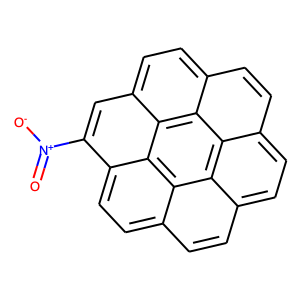

In [24]:
Draw.MolToImage(mmax,includeAtomsNumbers=False)

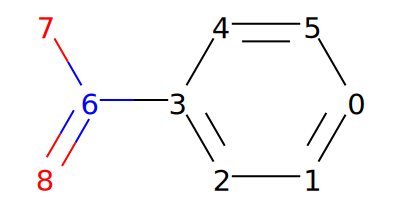

In [25]:
# your code for drawing with atoms numbered goes here
mmin = molecule_min[0]
    
SVG(draw(mmin))

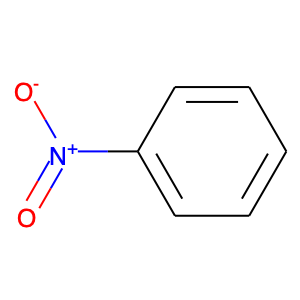

In [26]:
Draw.MolToImage(mmin,includeAtomsNumbers=False)

{'C': 12.011, 'N': 14.007, 'O': 15.999}


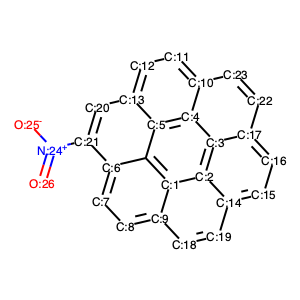

In [32]:
# your code goes here
def mol_with_atom_index(mol):
    masses = {}
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
        atom.GetSymbol()
        masses[atom.GetSymbol()] = atom.GetMass()
    return mol,masses 
print(mol_with_atom_index(mmax)[1])
Draw.MolToImage(mol_with_atom_index(mmax)[0])


We can see that they are in the ring and are similar to the previous drawings we created.

# Exercise 3

- Draw all moleculs that contain the smiles string <i>C(=O)O</i>.
- How many molecules have the element <i>Iodine</i> inside? Draw these molecules together with their names.
- How many molecules have the element <i>Bromine</i> inside? Draw these molecules together with their names and their formula.
- How many molecules have the element <i>Chlorine</i> inside? Which of these molecules contains the <i>most</i> atoms? Draw the molecule with the most atoms and get its name and formula.

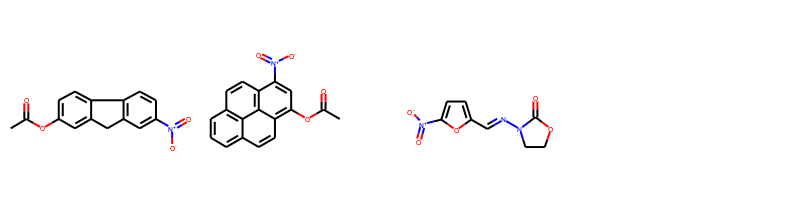

In [33]:
# your code for 'C(=O)O' goes here
def ex3(structure,suppl):
    patt = Chem.MolFromSmarts(structure)
    matches = list()
    names = list()
    names_formula = list()
    q4 = dict()
    maxi = 0
    for mol in suppl:
        if mol.HasSubstructMatch(patt):
            matches.append(mol)
            names.append(Chem.MolToMolBlock(mol).split('\n')[0])
            names_formula.append(str(Chem.MolToMolBlock(mol).split('\n')[0])+' \n'+str(m.GetProp('Formula')))
            u = mol.GetNumAtoms()
            if u>maxi:
                maxi = u
                q4['molecule']=mol
    q4['Number of matches']=len(matches)
    q4['max number of atoms']=maxi
    q4['formula'] = q4['molecule'].GetProp('Formula')
    q4['name'] = str(Chem.MolToMolBlock(q4['molecule']).split('\n')[0])

    return matches,names,names_formula,q4



matches,names,_,o = ex3('C(=O)O',suppl)

Draw.MolsToGridImage(matches, molsPerRow=4)

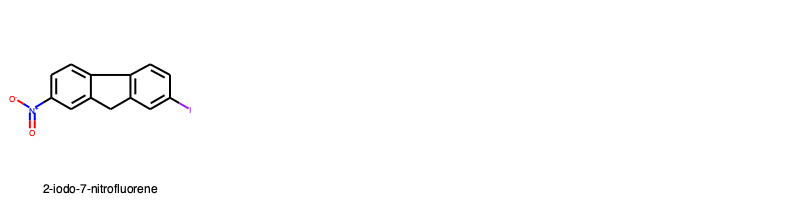

In [34]:
# your code for Iodine goes here
matches,names,_,o = ex3('I',suppl)

Draw.MolsToGridImage(matches, molsPerRow=4,legends = names)

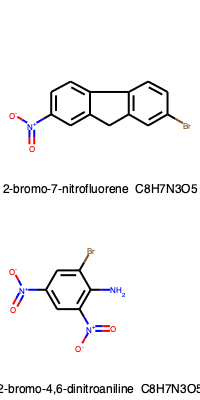

In [35]:

# your code for Bromine goes here
matches,names,names_formula,_ = ex3('Br',suppl)


Draw.MolsToGridImage(matches, molsPerRow=1,legends = names_formula)

number of matches 16
max number of atoms 22


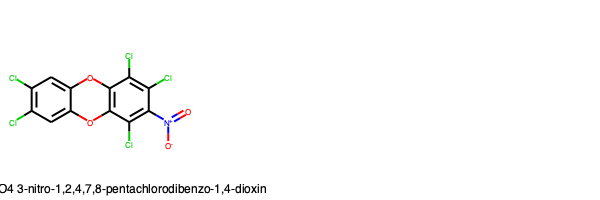

In [37]:
# your code for Chlorine goes here
matches,names,names_formula,q4= ex3('Cl',suppl)
print('number of matches',q4['Number of matches'])
print('max number of atoms',q4['max number of atoms'])

Draw.MolsToGridImage([q4['molecule']],legends = [q4['formula']+
                                                 '\n'
                                                    +q4['name']])
